## Task 1b (0.5p)

You are given data file `data.csv`.
- Load the data and do the pairplots of features and target, what can you observe?
- Compute the correlations and plot, the correlation matrix, what can you conclude?
- Train a random forest prediction and plot the histogram of feature importances. How does it align with previous observations?

### a) Load the data and do the pairplots of features and target, what can you observe?

C:\Users\wozni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wozni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wozni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

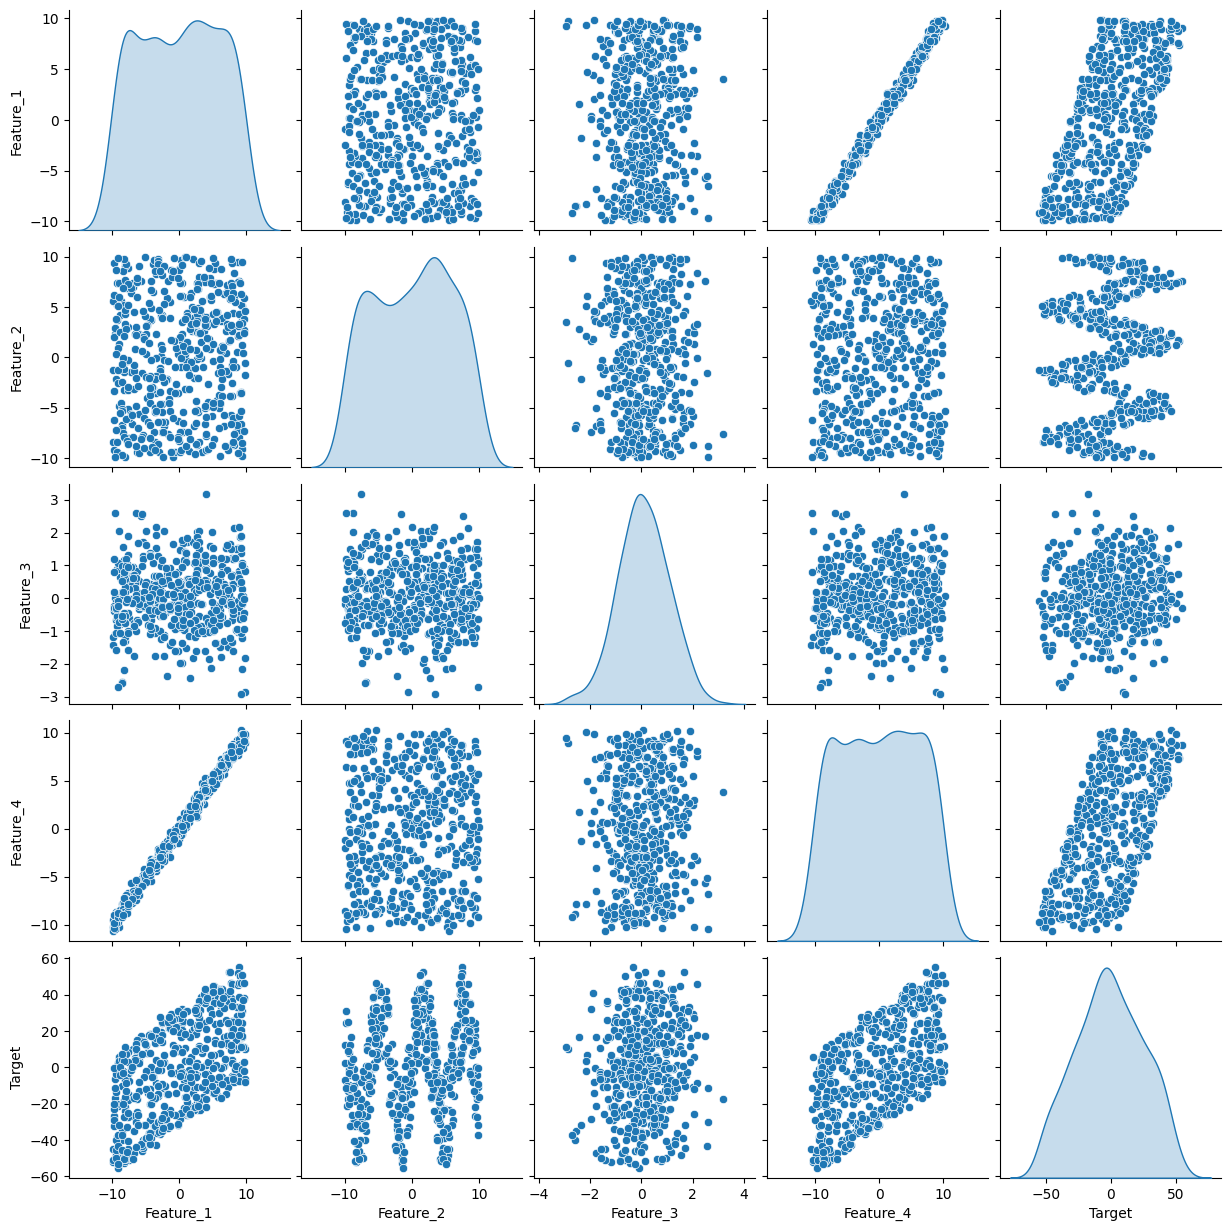

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')

sns.pairplot(df, diag_kind='kde')
plt.show()

We can observe a really big correlation between feature 1 and 4, and also between 1/4 and target. I don't yet see anything else - we will be able to confirm observations after calculating correlation matrix.

### Compute the correlations and plot, the correlation matrix, what can you conclude?

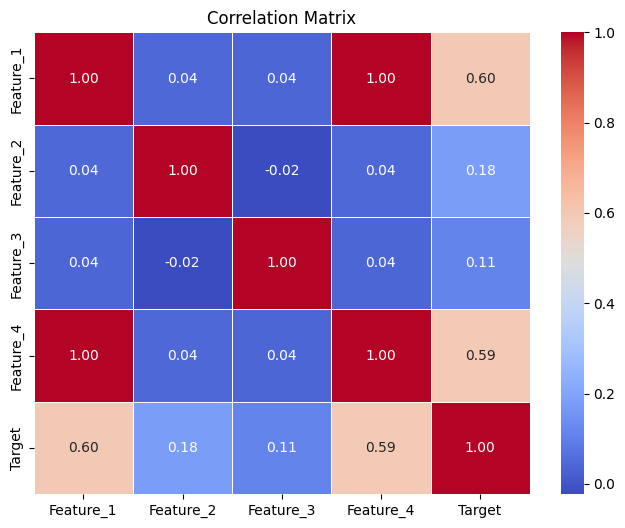

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can conclude that our observations were accurate:
 - very strong correlation between features 1 and 4
 - quite strong correlation between 1/4 and target

### c) Train a random forest prediction and plot the histogram of feature importances. How does it align with previous observations?

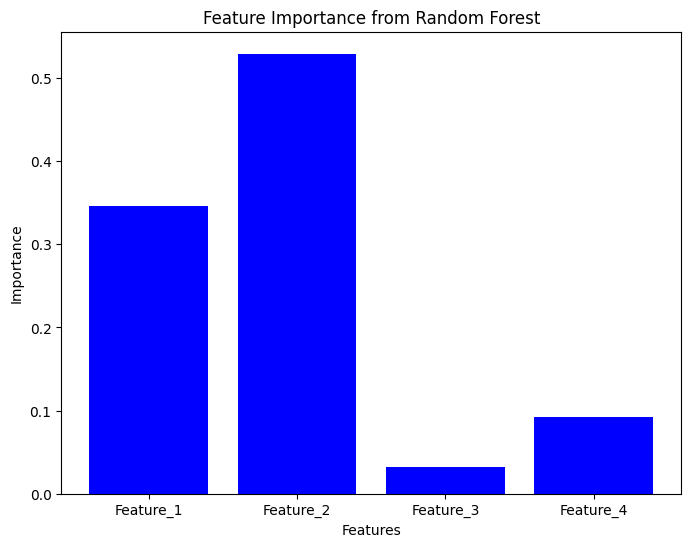

In [14]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Target'])
y = df['Target']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = rf.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


Here we have a revelation - feature 2 is found to be the most important one. (It might be capturing some hidden patterns that correlation alone does not reveal.)

## Conclussion
As we just have seen here (and in task1a), some features can be important even if correlation alone does not reveal it.